# Лабораторная работа

Баллы за секции:
- *Задание 1* - 10 баллов
- *Задание 2* - 20 баллов
- *Задание 3* - 30 баллов
- **Итого** - 60 баллов

Оценка за лабу $ = \frac{score}{6}$

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если **за каждое из заданий получено не менее 2 баллов**.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект - заполняете данный ноутбук, отправляете его через GitHub с указанием проверяющего.

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

***(Комментарии что курс по Python легче чем по C++ учтены)***

>**Примечание**
>
>Данные задания вдохновлены предметом "Введение в анализ данных" 2 курса, по итогу которого идёт отбор на DS-поток. Если вы видите себя в смежных областях, советуем выполнить данную лабораторку по максимуму.

In [ ]:
# Всё необходимое для выполнения данной лабораторной работы!
import requests
from time import sleep

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Задание 1. Парсинг - 10 баллов

В этом задании Вам предстоит работать с API сайта <a target="_blank" href="hh.ru">hh.ru</a>. Документация доступна по <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">ссылке</a>.

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, иначе вас забанят. Просрочка дедлайна по этой причине не принимается!</b>

**Задача:**
1. выбрать 5 интересующих вас профессий (не смежных, т.е. Аналатик и Data Engineer не считается корректным)
2. затем получить доступные по данным профессиям вакансии в Москве и выделить их физические координаты
3. нанести полученные координаты на карту местоположения компаний

*Пример запроса для профессии:*

In [ ]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Дворник",
    'area': 1,
    'page': 0,
    'per_page': 100
}

data = requests.get(URL, params).json()

Если Ваш запрос прошел успешно, то вы получите следующие ключи (значения данных ключей вы найдете по ссылке на документацию):

In [ ]:
data.keys()

dict_keys(['items', 'found', 'pages', 'page', 'per_page', 'clusters', 'arguments', 'fixes', 'suggests', 'alternate_url'])

In [ ]:
data

{'items': [{'id': '98771700',
   'premium': False,
   'name': 'Уборщик/уборщица',
   'department': None,
   'has_test': False,
   'response_letter_required': False,
   'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
   'salary': None,
   'type': {'id': 'open', 'name': 'Открытая'},
   'address': {'city': 'Москва',
    'street': 'Центральный административный округ, Пресненский район, Московский международный деловой центр Москва-Сити',
    'building': None,
    'lat': 55.749248,
    'lng': 37.541027,
    'description': None,
    'raw': 'Москва, Центральный административный округ, Пресненский район, Московский международный деловой центр Москва-Сити',
    'metro': {'station_name': 'Москва-Сити',
     'line_name': 'Филевская',
     'station_id': '4.179',
     'line_id': '4',
     'lat': 55.748056,
     'lng': 37.532778},
    'metro_stations': [{'station_name': 'Москва-Сити',
      'line_name': 'Филевская',
      'station_id': '4.179',
      'line_id': '4',
      

>**Примечание**
>
>В `data['pages']` будет хранится количество найденных страниц вакансий - для корректного сбора данных Вам нужно пробежать по **КАЖДОЙ** странице и сделать соотвествующие запросы.

>**Совет**
>
>Посмотрите что хранится в `items`!

(1 балл) Выберете для нас 5 наиболее интересных специальностей и получите по ним имеющиеся вакансии:

In [ ]:
URL = 'https://api.hh.ru/vacancies'
dream_profession = {"Агент влияния": 0, "Кинолог": 0, "Аэрофотогеодезист": 0, "Грумер": 0, "Пчеловод": 0}
dream_profession_data = list()
number_of_dream_professions = 0
for i in dream_profession:
  params = {
    'text': i,
    'area': 1,
    'page': 0,
    'per_page': 100
  }
  data = requests.get(URL, params).json()
  dream_profession_data.append(data)
  number_of_dream_professions += data["found"]
  dream_profession[i] = data["found"]

print(dream_profession)

{'Агент влияния': 35, 'Кинолог': 29, 'Аэрофотогеодезист': 1, 'Грумер': 64, 'Пчеловод': 1}


(1 балл) Посчитайте сколько всего найдено вакансий:

In [ ]:
number_of_dream_professions

130

(1 балл) Создайте структуру данных, которая будет хранить в себе имя компании и ее координаты (широта и долгота):

In [ ]:
class Company:
    def __init__(self, name : str, x : int, y : int):
      self.name = name
      self.x_cord = x
      self.y_cord = y
    def __repr__(self):
      return f"Name : {self.name}, coordinates = ({self.x_cord}, {self.y_cord})"



(1 балл) Создайте экземпляр этой структуры данных для каждой компании, которая выставила вакансию:

In [ ]:
companies = list()
counter = 0
for i,data in enumerate(dream_profession_data):
  job_company = []
  print(f"Профессия: {list(dream_profession)[i]}")
  for page in range(dream_profession[list(dream_profession)[i]] // 100 + 1):
    params = {
    'text': list(dream_profession)[i],
    'area': 1,
    'page': page,
    'per_page': 100
    }
    data = requests.get(URL, params).json()
    xc, yc = 0, 0
    for item in data["items"]:
      if item["address"]:
        xc, yc = item["address"]["lat"], item["address"]["lng"]
        counter += 1
      name = item["employer"]["name"]
      new_company = Company(name, xc, yc)
      if new_company not in companies:
        companies.append(new_company)
        print(new_company)



Профессия: Агент влияния
Name : Метриум, coordinates = (55.745341, 37.662344)
Name : Institute of Directors Moscow, coordinates = (55.745341, 37.662344)
Name : Самолет Плюс Мск Юг, coordinates = (55.740598, 37.629942)
Name : МВТЦ АМК ФСО России, coordinates = (55.836843, 37.620824)
Name : Аэрофлот, coordinates = (55.751817, 37.599292)
Name : ВЕБ АЙ ТИ, coordinates = (55.751817, 37.599292)
Name : Siberian Green, coordinates = (55.66076, 37.54356)
Name : МТС, coordinates = (55.66076, 37.54356)
Name : Hay-Studio, coordinates = (55.785852063218094, 37.5793104577726)
Name : Миксвел, coordinates = (55.789517, 37.545959)
Name : Миксвел, coordinates = (55.789517, 37.545959)
Name : М.Видео-Эльдорадо, coordinates = (55.775884, 37.671049)
Name : Национальный исследовательский университет Высшая школа экономики, coordinates = (55.775884, 37.671049)
Name : Роснефтефлот, coordinates = (55.775884, 37.671049)
Name : Авакс, coordinates = (55.716022, 37.64648)
Name : Бьютидрагс.Ру, coordinates = (55.735

(1 балл) Найдите количество вакансий, у которых заданы координаты (значения данных может быть пустым):

In [ ]:
counter

104

(1 балл) Отберите вакансии, которые расположены в пределах МКАД (можно грубо):

In [ ]:
%pip install geopy
from geopy.distance import geodesic

def is_inside(company):
  center = (55.7522, 37.6156)
  radius = 35
  dot = (company.x_cord, company.y_cord)
  return geodesic(center, dot).kilometers <= radius

nearest = []
for company in companies:
  if is_inside(company):
    nearest.append(company)
print(nearest)


[Name : Метриум, coordinates = (55.745341, 37.662344), Name : Institute of Directors Moscow, coordinates = (55.745341, 37.662344), Name : Самолет Плюс Мск Юг, coordinates = (55.740598, 37.629942), Name : МВТЦ АМК ФСО России, coordinates = (55.836843, 37.620824), Name : Аэрофлот, coordinates = (55.751817, 37.599292), Name : ВЕБ АЙ ТИ, coordinates = (55.751817, 37.599292), Name : Siberian Green, coordinates = (55.66076, 37.54356), Name : МТС, coordinates = (55.66076, 37.54356), Name : Hay-Studio, coordinates = (55.785852063218094, 37.5793104577726), Name : Миксвел, coordinates = (55.789517, 37.545959), Name : Миксвел, coordinates = (55.789517, 37.545959), Name : М.Видео-Эльдорадо, coordinates = (55.775884, 37.671049), Name : Национальный исследовательский университет Высшая школа экономики, coordinates = (55.775884, 37.671049), Name : Роснефтефлот, coordinates = (55.775884, 37.671049), Name : Авакс, coordinates = (55.716022, 37.64648), Name : Бьютидрагс.Ру, coordinates = (55.735738, 37.5

(1 балл) Постройте график в координатах "широта-долгота" для отображения вакансий внутри МКАД (не забывайте прописать прозрачность, чтобы увидеть скопления):

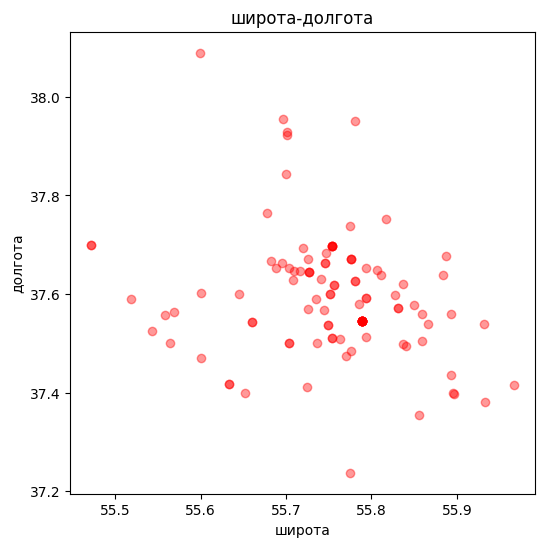

In [ ]:
plt.figure(figsize=(6, 6))
l1 = [i.x_cord for i in nearest]
l2 = [i.y_cord for i in nearest]
plt.scatter(l1, l2, color='red', alpha=0.4)

plt.title('широта-долгота')
plt.xlabel('широта')
plt.ylabel('долгота')

plt.show()

(1 балл) Нанесите все точки вакансий на карту (для этого вам поможет данная <a target="_blank" href="https://plotly.com/python/mapbox-layers/">документации</a>, не забудьте про прозрачность и центрирование по Москве):

In [ ]:
%pip install plotly

In [ ]:
import plotly.express as px
companies_dict = {comp.name: {"lat":comp.x_cord, "lon":comp.y_cord, "name":comp.name} for comp in nearest}
print(companies_dict)
companies_df = pd.DataFrame(companies_dict).T[["lat", "lon", "name"]]


fig = px.scatter_mapbox(companies_df, lat="lat", lon="lon", hover_name="name",
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

{'Метриум': {'lat': 55.745341, 'lon': 37.662344, 'name': 'Метриум'}, 'Institute of Directors Moscow': {'lat': 55.745341, 'lon': 37.662344, 'name': 'Institute of Directors Moscow'}, 'Самолет Плюс Мск Юг': {'lat': 55.740598, 'lon': 37.629942, 'name': 'Самолет Плюс Мск Юг'}, 'МВТЦ АМК ФСО России': {'lat': 55.836843, 'lon': 37.620824, 'name': 'МВТЦ АМК ФСО России'}, 'Аэрофлот': {'lat': 55.966786, 'lon': 37.415685, 'name': 'Аэрофлот'}, 'ВЕБ АЙ ТИ': {'lat': 55.751817, 'lon': 37.599292, 'name': 'ВЕБ АЙ ТИ'}, 'Siberian Green': {'lat': 55.66076, 'lon': 37.54356, 'name': 'Siberian Green'}, 'МТС': {'lat': 55.66076, 'lon': 37.54356, 'name': 'МТС'}, 'Hay-Studio': {'lat': 55.785852063218094, 'lon': 37.5793104577726, 'name': 'Hay-Studio'}, 'Миксвел': {'lat': 55.789517, 'lon': 37.545959, 'name': 'Миксвел'}, 'М.Видео-Эльдорадо': {'lat': 55.775884, 'lon': 37.671049, 'name': 'М.Видео-Эльдорадо'}, 'Национальный исследовательский университет Высшая школа экономики': {'lat': 55.789517, 'lon': 37.545959, 'na

In [ ]:
companies_df

,lat,lon,name
Метриум,55.745341,37.662344,Метриум
Institute of Directors Moscow,55.745341,37.662344,Institute of Directors Moscow
Самолет Плюс Мск Юг,55.740598,37.629942,Самолет Плюс Мск Юг
МВТЦ АМК ФСО России,55.836843,37.620824,МВТЦ АМК ФСО России
Аэрофлот,55.966786,37.415685,Аэрофлот
...,...,...,...
Зоосалон КотоПёсоф,55.700872,37.928713,Зоосалон КотоПёсоф
Ветцентр на Южной,55.518729,37.590282,Ветцентр на Южной
Хажеева Айгуль Рифгатовна,55.893672,37.558562,Хажеева Айгуль Рифгатовна
Касаткина Екатерина Алексеевна,55.850373,37.578181,Касаткина Екатерина Алексеевна


(2 балла) **Сделайте выводы о проделанной работе:**

>*Подсказки для маленьких: Что вы можете сказать про районы Москвы? Что вы можете сказать про зарплаты? Что вы можете сказать про спрос?*

Мной были выбраны достаточно специфические прфоессии, однако, после проделанной работы стало ясно, что сфера услуг для собак очень востребована в наши дни. Тренировка и подстрижка собак очень хорошо оплачивается: зарплаты доходят до 200000, а офисы располагаются в элитных районах Москвы, но есть и те, что на окраинах.  
Очевидно Агент влияния так же очень востребованная профессия, тут зарплаты еще выше чем у грумеров, а ищут себе таких специалистов все, имеющие хоть какое-то отношение к экономики: от ВШЭ до крупных банков.
Разочаровали профессии пчеловод и аэрофотогеодезист - совершенно невостребованные професси с низкой оплатой труда и офисами где-то в глуши.
Печально наблюдать за миром, где постепенно перестают быть нужны пчеловоды.

## Задание 2. Анализ данных - 20 баллов

Вам предстоит проанализировать датасет, содержащий информацию об бриллианта, их стоимости и остальных характеристиках.



Поясним значения хранящиеся в колонках:
*   `cut` - огранка бриллианта (относится к одной из примерно 10 наиболее распространенных)
*   `color` - цвет бриллианта, прозрачные бриллианты имеют градацию `D-Z`, "более высокие" буквы - более желтоватые, но часто имеют лучшие значения, поскольку цвет трудно определить один раз в кольце
*   `clarity` - чистота бриллианта, наличие включений (внутренних дефектов), чем меньше и мельче, тем лучше
*   `carat_weight` - масса бриллианта (слабо связана с размером бриллианта, т.к. огранка и качество огранки, как правило, играют большую роль)
*   `cut_quality` - качество ограники по системе оценки GIA Cut
*   `lab` - лаборатория оценивания
*   `meas_length` - длина бриллианта
*   `meas_width` - ширина бриллианта
*   `meas_depth` - глубина бриллианта
*   `total_sales_price` - цена бриллианта в долларах.
*    **и прочие колонки**

Скачаем данные:

In [ ]:
!gdown 10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8

Downloading...
From: https://drive.google.com/uc?id=10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8
To: /content/diamonds.csv
100% 35.4M/35.4M [00:00<00:00, 38.4MB/s]


Создадим DataFrame:

In [ ]:
import pandas as pd

diamonds = pd.read_csv("diamonds.csv")
diamonds

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,...,8.66,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,...,5.71,TK,XTK,unknown,NaN,Green,unknown,NaN,Fancy Light,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,...,10.20,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,...,3.47,XTN,VTK,unknown,Faint,Red,unknown,unknown,Fancy,1350000


(0.5 балла) Выведете первые 5 строк датасета:

In [ ]:
diamonds.head(5)

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


(0.5 балла) Найдите количество бриллиантов всего в данном датасете:

In [ ]:
diamonds.shape[0]

219703

(0.5 балла) Выведите максимальную и минимальную цену бриллианта в формате `номер - цена`:

In [ ]:
l1 = [[i, price] for i,price in enumerate(diamonds["total_sales_price"])]
l1 = sorted(l1, key = lambda x: x[1])
print(f'{l1[-1][0]} - {l1[-1][1]}\n{l1[0][0]} - {l1[0][1]}')

219702 - 1449881
0 - 200


(1 балл) Посчитайте количество пропусков (пропуском считается значение `unknown` или `None`):

In [ ]:
res = 0
l = []
for i,row in enumerate(list(diamonds.columns.values)):
  c = (list(diamonds[row])).count("unknown") + diamonds.isnull().sum()[i]
  if c:
    l.append(row)
    res+=c

print(res)


1891168


(1 балл) Найдите в каких столбцах присутствуют пропуски:

In [ ]:
l

['color',
 'cut_quality',
 'eye_clean',
 'culet_size',
 'culet_condition',
 'girdle_min',
 'girdle_max',
 'fluor_color',
 'fluor_intensity',
 'fancy_color_dominant_color',
 'fancy_color_secondary_color',
 'fancy_color_overtone',
 'fancy_color_intensity']

В нашем датасете присутствуют колонки, которые начинаются с `fancy_color_` или `fluor_`. Большинство значений в этих колонках - `unknown` или `None`, поэтому мы считаем их малоинформативными.

Ваша задача:

1. (0.5 балла) найти количество таких колонок, которые начинаются с `fancy_color_` или `fluor_`:

In [ ]:
ans = 0
cols = []
for col in list(diamonds.columns.values):
  if col.startswith("fancy_color_") > 0 or col.startswith("fluor_") > 0:
    ans += 1
    cols.append(col)
print(ans)

6


2. (0.5 балла) найти количество информативных (не `None` или `unknown`) значений в этих колонках:

In [ ]:
for i,row in enumerate(cols):
  r = 0
  r = diamonds[diamonds[row] == "unknown"].shape[0]
  r += diamonds[row].isnull().sum()
  res = len(diamonds[row]) - r
  print(f"В {row} количество информативных значений - {res}")

В fluor_color количество информативных значений - 15726
В fluor_intensity количество информативных значений - 76084
В fancy_color_dominant_color количество информативных значений - 9164
В fancy_color_secondary_color количество информативных значений - 1062
В fancy_color_overtone количество информативных значений - 388
В fancy_color_intensity количество информативных значений - 9162


3. (0.5 балла) удалить данные колонки из датасета, сохранив изменения (в дальнейшем работаем измененным датасетом):

In [ ]:
diamonds = diamonds.drop(columns = cols)

(1 балл) Проделайте тоже самое для колонок, начинающихся с `culet_`:

In [ ]:
ans = 0
cols = []
for col in list(diamonds.columns.values):
  if col.startswith("culet_"):
    ans += 1
    cols.append(col)
print(ans)

for i,row in enumerate(cols):
  r = 0
  r = diamonds[diamonds[row] == "unknown"].shape[0]
  r += diamonds[row].isnull().sum()
  res = len(diamonds[row]) - r
  print(f"В {row} количество информативных значений - {res}")

diamonds = diamonds.drop(columns = cols)

2
В culet_size количество информативных значений - 133963
В culet_condition количество информативных значений - 15319


(1 балл) Посчитайте сколько бы стоил (в тысячах долларов) сейф, в котором хранились бы все бриллианты из датасета:

In [ ]:
diamonds["total_sales_price"].sum() / 1000

1517721.991

Немного необоснованных манипуляций.

(1 балл) Выберите из датасета строки с четными индексами и выведете значения (не меняя нумерацию индексов):

In [ ]:
diamonds[diamonds['Unnamed: 0'] % 2 == 0]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
8,8,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,63.5,59.5,2.89,2.92,1.85,STK,TK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219693,219694,Round,E,IF,12.52,Excellent,GIA,Excellent,Excellent,unknown,62.1,58.0,14.84,14.91,9.24,unknown,unknown,1121792
219695,219696,Cushion Modified,unknown,VVS1,10.00,unknown,GIA,Very Good,Excellent,unknown,78.1,60.0,11.78,10.84,8.47,unknown,unknown,1124122
219697,219698,Oval,unknown,VS1,10.04,unknown,GIA,Excellent,Excellent,unknown,72.8,55.0,14.13,10.86,7.90,unknown,unknown,1161102
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,64.8,65.0,11.55,8.81,5.71,TK,XTK,1292500


(0.5 балла) А теперь с индексами, кратными 6:

In [ ]:
diamonds[diamonds['Unnamed: 0'] % 6 == 0]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
12,12,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,61.8,58.5,2.85,2.89,1.77,STK,TK,200
18,18,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.0,60.0,2.91,2.92,1.78,M,M,200
24,24,Round,L,I1,0.34,Excellent,IGI,Excellent,Excellent,unknown,0.0,0.0,0.00,0.00,0.00,unknown,unknown,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219677,219678,Round,G,VS1,10.14,Excellent,GIA,Excellent,Excellent,unknown,61.8,59.0,13.84,13.88,8.56,M,STK,851760
219683,219684,Pear,unknown,VS2,1.51,unknown,GIA,Very Good,Very Good,unknown,63.8,59.0,10.73,5.61,3.58,unknown,unknown,966401
219689,219690,Round,F,IF,10.66,Excellent,GIA,Excellent,Excellent,unknown,61.4,58.0,14.14,14.16,8.69,M,STK,1034844
219695,219696,Cushion Modified,unknown,VVS1,10.00,unknown,GIA,Very Good,Excellent,unknown,78.1,60.0,11.78,10.84,8.47,unknown,unknown,1124122


(1 балл) Выберете из датасета только категорильные признаки и выведете датасет:

In [ ]:
ds = diamonds[["cut", "color", 'clarity', "cut_quality", 'lab', "symmetry", "polish", "eye_clean", "girdle_min", "girdle_max"]]
ds

,cut,color,clarity,cut_quality,lab,symmetry,polish,eye_clean,girdle_min,girdle_max
0,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,M,M
1,Round,E,VVS2,Very Good,IGI,Very Good,Very Good,unknown,STK,STK
2,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,TN,M
3,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,M,STK
4,Round,E,VVS2,Very Good,IGI,Very Good,Excellent,unknown,STK,STK
...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,M,STK
219699,Radiant,unknown,VS2,unknown,GIA,Very Good,Very Good,unknown,TK,XTK
219700,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,TN,M
219701,Princess,unknown,SI2,unknown,GIA,Good,Good,unknown,XTN,VTK


>**Примечание**
>
>Данный датасет можно использовать для задания 3 (с использованием `sklearn`)

(0.5 балла) Выберете столбец с данными о цене бриллиантов и домножите его на тот столбец, только транспонированный, и выведите полученную матрицу:

In [ ]:
arr = np.array(diamonds["total_sales_price"])
arr = arr.reshape(1,len(arr))
arr@arr.T

array([[158540672665477]])

### Построение графиков

**Требования к графику:**

1.   График должен быть подписан
2.   Оси должны быть подписаны
3.   Должна быть легенда графика
4.   График должен быть информативным (желательно без сильных выбросов)

**Все надписи на русском языке!**

>**Примечание**
>
>График необходимо строить для очищенных данных - в них не должно быть пропусков по осям, по которым строите график. При этом **не перезатирайте** имеющийся датафрейм!

(2 балла) Постройте график `цвет бриллианта - стоимость`:

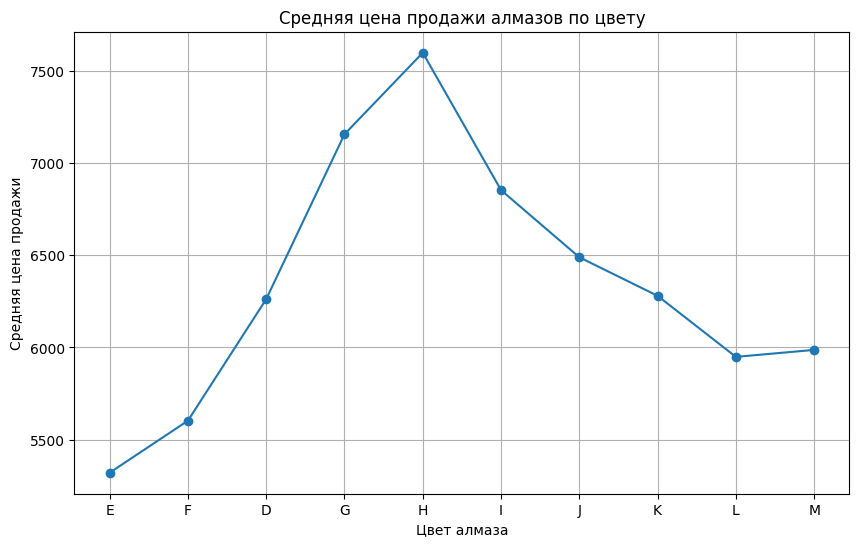

In [ ]:
ds1 = diamonds.copy()
colors = list()
avg_prices = list()
for color in dict(ds1["color"].value_counts()).keys():
  if color != "unknown":
    avg_price = ds1[ds1["color"] == color]['total_sales_price'].mean()
    colors.append(color)
    avg_prices.append(int(avg_price))

plt.figure(figsize=(10, 6))
plt.plot(colors, avg_prices, marker='o', linestyle='-')

plt.title('Средняя цена продажи алмазов по цвету')
plt.xlabel('Цвет алмаза')
plt.ylabel('Средняя цена продажи')

plt.grid(True)

plt.show()


(2 балла) Постройте график `лабараторная оценка - кол-во бриллиантов`:

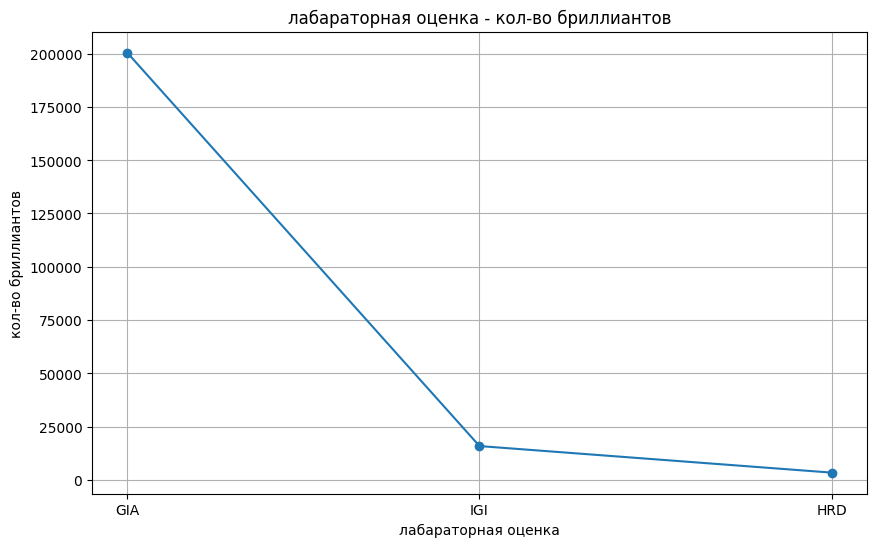

In [ ]:
ds2 = diamonds.copy()
labs = list()
amounts = list()
for lab in dict(ds2["lab"].value_counts()).keys():
  if lab != "unknown":
    amount = ds2[ds2["lab"] == lab].shape[0]
    labs.append(lab)
    amounts.append(int(amount))

plt.figure(figsize=(10, 6))
plt.plot(labs, amounts, marker='o', linestyle='-')

plt.title('лабараторная оценка - кол-во бриллиантов')
plt.xlabel('лабараторная оценка')
plt.ylabel('кол-во бриллиантов')

plt.grid(True)

plt.show()

(2 балла) Постройте график `вес бриллианта - стоимость`:

In [ ]:
ds3 = diamonds.copy()
weight = list()
price = list()
for i, row in ds3.iterrows():
  weight.append(row["carat_weight"])
  price.append(row["total_sales_price"])



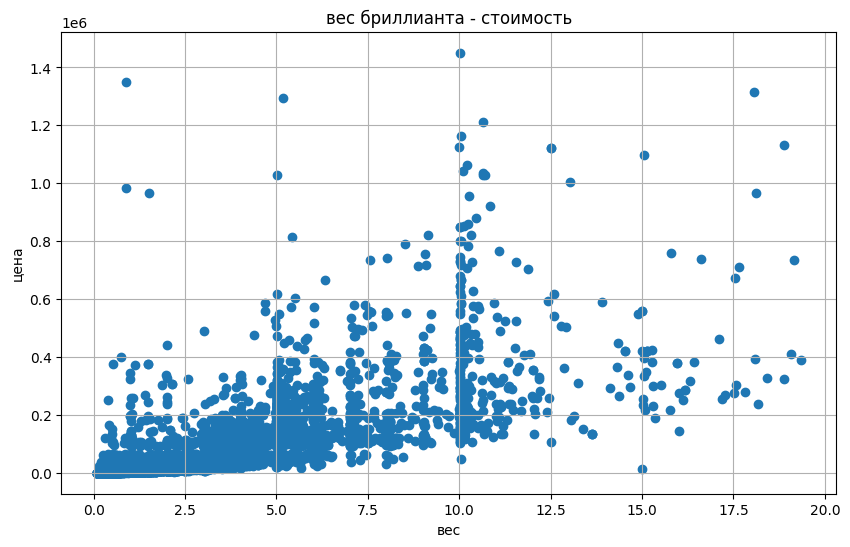

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(weight, price)

plt.title('вес бриллианта - стоимость')
plt.xlabel('вес')
plt.ylabel('цена')

plt.grid(True)

plt.show()

(2 балла) Постройте график `система оценки GIA Cut - кол-во бриллиантов`:

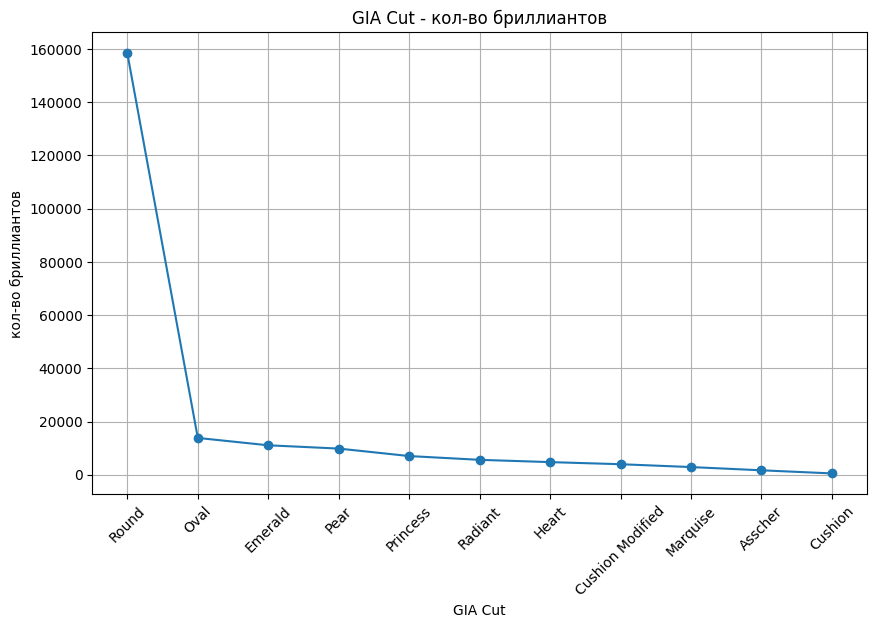

In [ ]:
ds4 = diamonds.copy()
cuts = list()
amounts = list()
for cut in dict(ds4["cut"].value_counts()).keys():
  if cut != "unknown":
    amount = ds4[ds4["cut"] == cut].shape[0]
    cuts.append(cut)
    amounts.append(int(amount))

plt.figure(figsize=(10, 6))
plt.plot(cuts, amounts, marker='o', linestyle='-')

plt.title('GIA Cut - кол-во бриллиантов')
plt.xlabel('GIA Cut')
plt.ylabel('кол-во бриллиантов')
plt.xticks(rotation=45)

plt.grid(True)

plt.show()

(2 балла) **Сделайте выводы по построенным графикам:**

Данный дата сет не идеален (как и любой дата сет на реальных данных), в нем много пропусков а так же из за неоптимальной выборки в графиках много выбросов, мешающих анализу
Однако, что то сказать все таки можно:
1. График цены от цвета показывает нормальное распределение и самы востребованный цвет - H
2. Второй график четко дает понять, что чем лучше лабароторная оценка тем реже встречаются такие алмазы.
3. третий график показывает что явной корреляции стоимости и веса нет, однако, прослеживается линия тренда в сторону увеличения цены от увеличения веса. Скорее всего дело тут в качестве алмазов.
4. 4 график показывает, что наиболее распространенный GIA Cut - Round.  

## Задание 3. Модель - 30 баллов

В данном задании вам предстоит построить классифицирующую модель размер алмаза и его стоимости, а затем оценить полученную модель.

>**Примечание**
>
>Данная модель не претендует на самый верный индикатор стоимости алмаза, ведь мы не учитываем ничего больше чем стоимость алмаза. Исключительно для образовательных целей :)

Для построения модели нам понадобится 4 столбца, а именно:
- `meas_length`
- `meas_width`
- `meas_depth`
- `total_sales_price`

От остальных столбцов можно избавиться.

(1 балл) Создайте новый датасет и выведите его первые 10 строк:

In [ ]:
new_ds = diamonds[["meas_length", "meas_width", "meas_depth", "total_sales_price"]]
new_ds.head(10)

,meas_length,meas_width,meas_depth,total_sales_price
0,2.85,2.87,1.79,200
1,2.84,2.89,1.78,200
2,2.88,2.90,1.77,200
3,2.86,2.88,1.78,200
4,2.79,2.83,1.82,200
5,2.95,2.99,1.81,200
6,2.85,2.88,1.84,200
7,2.86,2.89,1.78,200
8,2.89,2.92,1.85,200
9,2.83,2.87,1.80,200


(1 балл) Перемешайте строки в датафрейме случайным образом:

In [ ]:
new_ds = new_ds.sample(frac = 1)
new_ds.head()

,meas_length,meas_width,meas_depth,total_sales_price
175903,6.37,6.42,3.96,6972
106588,5.15,5.18,3.24,1842
21960,4.20,4.24,2.71,738
3573,4.33,4.34,2.57,550
6580,4.27,4.30,2.64,602


(1 балл) Сформируем новую колонку - для каждого бриллианта найдем сумму Минковского (p=3) по 3 измерениям бриллианта:

In [ ]:
new_ds["minkovsky_summ"] = new_ds["meas_length"] + new_ds["meas_width"] + new_ds["meas_depth"]
new_ds.head()

,meas_length,meas_width,meas_depth,total_sales_price,minkovsky_summ
175903,6.37,6.42,3.96,6972,16.75
106588,5.15,5.18,3.24,1842,13.57
21960,4.20,4.24,2.71,738,11.15
3573,4.33,4.34,2.57,550,11.24
6580,4.27,4.30,2.64,602,11.21


(1 балл) Сформируем новый датасет из двух колонок - сумма Минковского и `total_sales_price`:

In [ ]:
mink_ds = new_ds[["minkovsky_summ", "total_sales_price"]]
mink_ds

,minkovsky_summ,total_sales_price
175903,16.75,6972
106588,13.57,1842
21960,11.15,738
3573,11.24,550
6580,11.21,602
...,...,...
120382,13.43,2432
138464,12.88,3335
213303,21.23,36692
191168,16.46,10967


(1 балл) Разделите вашу выборку на две части в соотношении 8:2 - одна выборка будет для тренировка, а другая для тестов вашей модели:

In [ ]:
from sklearn.model_selection import train_test_split
data = new_ds[["meas_length", "meas_width", "meas_depth", "total_sales_price"]]
X_train, X_test, y_train, y_test = train_test_split(data, mink_ds, test_size=2/8, random_state=4)

minkovsky_summ = y_train['minkovsky_summ']
minkovsky_summ_test = y_test['minkovsky_summ']
price = y_train['total_sales_price']
price_test = y_test['total_sales_price']

(2 балла) Постройте график зависимости стоимости от вашего нового параметра размера для тренинг-выборки:

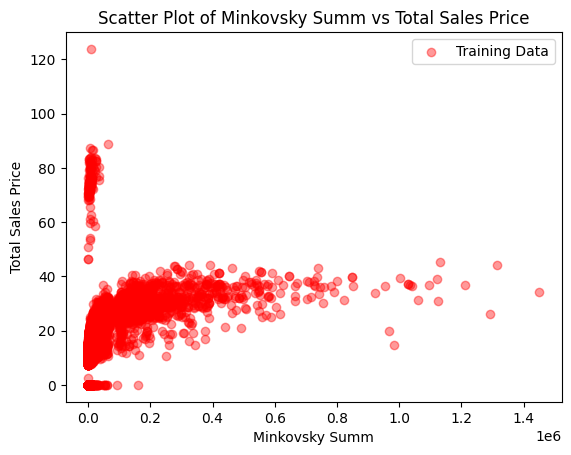

In [ ]:
plt.scatter(price, minkovsky_summ, color='red', alpha=0.4, label='Training Data')

plt.xlabel('Minkovsky Summ')
plt.ylabel('Total Sales Price')
plt.title('Scatter Plot of Minkovsky Summ vs Total Sales Price')

plt.legend()

plt.show()

(2 балла) Нанесите на тот же график тестовую выборку, используя другой цвет (не забудьте про параметр прозрачности):

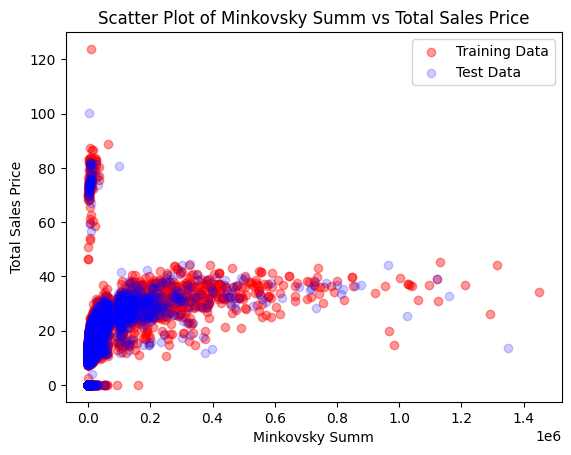

In [ ]:
plt.scatter(price, minkovsky_summ, color='red', alpha=0.4, label='Training Data')
plt.scatter(price_test, minkovsky_summ_test, color='blue', alpha=0.2, label='Test Data')

plt.xlabel('Minkovsky Summ')
plt.ylabel('Total Sales Price')
plt.title('Scatter Plot of Minkovsky Summ vs Total Sales Price')

plt.legend()

plt.show()

(3 балла) Найдите для каждой бриллианта из тестовой выборки его "ближайшего соседа" из тренинг-выборки. Для каждого бриллианта из тестовой выборки найдите расстояния до соответствующего ближайшего соседа:

In [ ]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

164777 54926 164777 54926


In [ ]:
X_train.index.name = 'index'
X_test.index.name = 'index'
X_train = X_train[:200]
X_test = X_test[:200]


def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

X_test['nearest_neighbor_index'] = np.nan
X_test['distance_to_nearest_neighbor'] = np.nan
for i, row_test in X_test.iterrows():
    min_distance = np.inf
    nearest_neighbor_index = None

    for j, row_train in X_train.iterrows():
        distance = euclidean_distance(row_test[['meas_length', 'meas_width', 'meas_depth', 'total_sales_price']],
                                      row_train[['meas_length', 'meas_width', 'meas_depth', 'total_sales_price']])

        if distance < min_distance:
            min_distance = distance
            nearest_neighbor_index = j

    X_test.loc[i, 'nearest_neighbor_index'] = nearest_neighbor_index
    X_test.loc[i, 'distance_to_nearest_neighbor'] = min_distance



<ipython-input-241-e1a997efadd4>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-241-e1a997efadd4>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
X_test

,meas_length,meas_width,meas_depth,total_sales_price,nearest_neighbor_index,distance_to_nearest_neighbor
index,,,,,,
106384,5.10,5.12,3.12,1800,104359.0,32.005140
167224,5.15,5.13,3.62,5271,163125.0,15.085069
73668,4.58,4.60,2.86,1084,73808.0,0.464112
12028,4.29,4.30,2.68,654,12001.0,0.017321
109448,5.11,5.12,3.16,1914,107691.0,6.000867
...,...,...,...,...,...,...
42770,4.35,4.37,2.73,876,38882.0,0.263059
145277,5.64,5.68,3.55,3570,145769.0,20.066053
164297,5.01,4.99,4.01,4860,163468.0,163.012561


(3 балла) Найдите насколько сильно (в процентах) отличается цена бриллиантов из тестовой выборки от их соответствующих ближайших соседей:

In [ ]:
X_test['price_difference_percent'] = np.nan

for i, row in X_test.iterrows():
    test_price = row['total_sales_price']
    nearest_neighbor_index = int(row['nearest_neighbor_index'])
    nearest_neighbor_price = X_train.at[nearest_neighbor_index, 'total_sales_price']

    price_difference_percent = ((test_price - nearest_neighbor_price) / nearest_neighbor_price) * 100

    X_test.at[i, 'price_difference_percent'] = abs(price_difference_percent)

average_price_difference_percent = X_test['price_difference_percent'].mean()


In [ ]:
X_test

,meas_length,meas_width,meas_depth,total_sales_price,nearest_neighbor_index,distance_to_nearest_neighbor,price_difference_percent
index,,,,,,,
106384,5.10,5.12,3.12,1800,104359.0,32.005140,1.809955
167224,5.15,5.13,3.62,5271,163125.0,15.085069,0.285388
73668,4.58,4.60,2.86,1084,73808.0,0.464112,0.000000
12028,4.29,4.30,2.68,654,12001.0,0.017321,0.000000
109448,5.11,5.12,3.16,1914,107691.0,6.000867,0.312500
...,...,...,...,...,...,...,...
42770,4.35,4.37,2.73,876,38882.0,0.263059,0.000000
145277,5.64,5.68,3.55,3570,145769.0,20.066053,0.557103
164297,5.01,4.99,4.01,4860,163468.0,163.012561,3.245073


In [ ]:
average_price_difference_percent

1.8396485158164593

**Данная модель является выдумкой автора. Не важен коэффициент ошибки, важны ваши шаги для получения коэффициента.**

### Введение в машинное обучение

Теперь давайте познакомимся с таким сильным инструментом как `sklearn`.

Вам необходимо:
1. выбрать 2 категориальных признака
2. на их основе обучить решающее дерево
3. оценить среднеквадратичную ошибку цены бриллианта
4. сделать пп. 1-3 и выбрать ту пару, которая дает лучший результат
5. сделать выводы

(3 балла) Мы работаем с категориальными признаками, для них не понятно что есть "больше" и "меньше". Поэтому нам нужно предварительно закодировать значения наших признаков, с чем нам поможет [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html):

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ds

,cut,color,clarity,cut_quality,lab,symmetry,polish,eye_clean,girdle_min,girdle_max
0,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,M,M
1,Round,E,VVS2,Very Good,IGI,Very Good,Very Good,unknown,STK,STK
2,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,TN,M
3,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,M,STK
4,Round,E,VVS2,Very Good,IGI,Very Good,Excellent,unknown,STK,STK
...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,M,STK
219699,Radiant,unknown,VS2,unknown,GIA,Very Good,Very Good,unknown,TK,XTK
219700,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,TN,M
219701,Princess,unknown,SI2,unknown,GIA,Good,Good,unknown,XTN,VTK


In [ ]:
categorical = ["cut", "color", 'clarity', "cut_quality", 'lab', "symmetry", "polish", "eye_clean", "girdle_min", "girdle_max"]
ds = diamonds[categorical]

y = diamonds[["total_sales_price"]]
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ds_encoded = encoder.fit_transform(ds)

In [ ]:
ds_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
y

,total_sales_price
0,200
1,200
2,200
3,200
4,200
...,...
219698,1210692
219699,1292500
219700,1315496
219701,1350000


(3 балла) Разбейте датасет на обучающую и тестовую выбору. Для этого вам поможет [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

In [ ]:
DS_train, DS_test, ds_train, ds_test = train_test_split(ds_encoded, y, test_size=0.25, random_state=42)

In [ ]:
DS_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
DS_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
ds_train

,total_sales_price
139498,3300
1261,490
51429,936
117874,2314
78373,1176
...,...
119879,2408
103694,1746
131932,2970
146867,3636


In [ ]:
ds_test

,total_sales_price
167888,5376
53087,940
168078,5400
194939,12893
58943,974
...,...
218832,161230
133593,3006
205998,22920
65459,1008


(3 балла) Затем создайте и обучите вашу модель - [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html):

In [ ]:
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(DS_train, y_train)

DecisionTreeRegressor(random_state=42)

(3 балла) Оцените ошибку вашей модели при помощи [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html):

In [ ]:
y_pred = tree_regressor.predict(DS_test)
mse = mean_squared_error(y_test, y_pred)

In [ ]:
print(f"Среднеквадратичная ошибка:{mse}")

Среднеквадратичная ошибка:389842549.64498687


Теперь проделаем это для каждой пары из списка

In [ ]:
categorical = ["cut", "color", 'clarity', "cut_quality", 'lab', "symmetry", "polish", "eye_clean", "girdle_min", "girdle_max"]
y = diamonds[["total_sales_price"]]
ds = diamonds[categorical]
best_mse = 1e20
pair = []
for atr1 in categorical:
  for atr2 in categorical:
    if atr1 != atr2:
      temp_ds = ds[[atr1, atr2]]
      encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
      temp_ds_encoded = encoder.fit_transform(temp_ds)
      temp_DS_train, temp_DS_test, y_train, y_test = train_test_split(temp_ds_encoded, y, test_size=0.25, random_state=42)

      tree_regressor = DecisionTreeRegressor(random_state=42)
      tree_regressor.fit(temp_DS_train, y_train)
      y_pred = tree_regressor.predict(temp_DS_test)
      mse = mean_squared_error(y_test, y_pred)
      print(f"для пары {atr1, atr2} среднеквадратичеая ошибка цены бриллианта - {mse}")
      if best_mse > mse:
        best_mse = mse
        pair = atr1, atr2


print(f"для пары {pair} среднеквадратичеая ошибка цены бриллианта оказалась наименьшей - {best_mse}")

для пары ('cut', 'color') среднеквадратичеая ошибка цены бриллианта - 786108199.1075953
для пары ('cut', 'clarity') среднеквадратичеая ошибка цены бриллианта - 790047904.9151583
для пары ('cut', 'cut_quality') среднеквадратичеая ошибка цены бриллианта - 790788613.2202373
для пары ('cut', 'lab') среднеквадратичеая ошибка цены бриллианта - 788016202.9944185
для пары ('cut', 'symmetry') среднеквадратичеая ошибка цены бриллианта - 784828360.3429666
для пары ('cut', 'polish') среднеквадратичеая ошибка цены бриллианта - 789047350.2085108
для пары ('cut', 'eye_clean') среднеквадратичеая ошибка цены бриллианта - 790562838.1264352
для пары ('cut', 'girdle_min') среднеквадратичеая ошибка цены бриллианта - 789570609.4583896
для пары ('cut', 'girdle_max') среднеквадратичеая ошибка цены бриллианта - 788737664.4358858
для пары ('color', 'cut') среднеквадратичеая ошибка цены бриллианта - 786108199.1075953
для пары ('color', 'clarity') среднеквадратичеая ошибка цены бриллианта - 793914743.9070451
для 

In [ ]:
print(f"для пары {pair} среднеквадратичеая ошибка цены бриллианта оказалась наименьшей - {best_mse}")

для пары ('cut', 'symmetry') среднеквадратичеая ошибка цены бриллианта оказалась наименьшей - 784828360.3429666


(3 балла) **Сделайте выводы какие категориальные признаки лучше:**

*Подсказки для маленьких: Что вы можете сказать о зависимости по вашей выборке признаков? Какой вы можете сделать вывод об готовых инструментах для работы и написанных Вами?*

Наименьшую ошибку в предсказании цены показала пара ргументов 'cut', 'symmetry' - скорее всего именно эти параметры наибольшим образом влияют на красоту и как следствие цену алмаза. Но в общем и целом ошибка все равно большая, это связано с тем, что двух параметров для обучения мало. В начале я попробовал обучить модель на всех признаках и ошибка была вдвое меньше.
В первой части мной была написана примитивная модель (речь идет о поиске расстояний) но она показала неплохую ошибку. Во второй части я пользовался существующими библиотеками - и это конечно более сильный и удобный инструмент, хотя ошибка все равно, получилась большая.